<a href="https://colab.research.google.com/github/AnikaZN/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Anika_Nacey_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [0]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
phones_popu = pd.merge(cell_phones, population, how='inner')
phones_popu.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


In [0]:
phones_popu.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
location = geo_country_codes[['geo', 'country']]

df = pd.merge(phones_popu, location)
df.shape

(8590, 5)

In [0]:
df.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
df['phone_per_person'] = df['cell_phones_total'] / df['population_total']


df.head()

,geo,time,cell_phones_total,population_total,country,phone_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
df['geo'] = df['geo'].str.upper()

df.head()

,geo,time,cell_phones_total,population_total,country,phone_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
df.describe(include='all')

#time min = 1960, time max = 2017
#unique countries = 195

,geo,time,cell_phones_total,population_total,country,phone_per_person
count,8590,8590.000000,8.590000e+03,8.590000e+03,8590,8590.000000
unique,195,NaN,NaN,NaN,195,NaN
top,TGO,NaN,NaN,NaN,Tanzania,NaN
freq,46,NaN,NaN,NaN,46,NaN
mean,NaN,1994.193481,9.004950e+06,2.983823e+07,NaN,0.279639
std,NaN,14.257975,5.573408e+07,1.161284e+08,NaN,0.454247
min,NaN,1960.000000,0.000000e+00,4.433000e+03,NaN,0.000000
25%,NaN,1983.000000,0.000000e+00,1.456148e+06,NaN,0.000000
50%,NaN,1995.000000,6.200000e+03,5.725062e+06,NaN,0.001564
75%,NaN,2006.000000,1.697652e+06,1.810581e+07,NaN,0.461149


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
now = df[df['time'] == 2017]

now.head()

,geo,time,cell_phones_total,population_total,country,phone_per_person
45,AFG,2017,23929713.0,35530081,Afghanistan,0.673506
91,AGO,2017,13323952.0,29784193,Angola,0.447350
137,ALB,2017,3497950.0,2930187,Albania,1.193763
183,AND,2017,80337.0,76965,Andorra,1.043812
219,ARE,2017,19826224.0,9400145,United Arab Emirates,2.109140


In [0]:
top5 = now.sort_values(by=['cell_phones_total'], ascending=False)

top5.head()

,geo,time,cell_phones_total,population_total,country,phone_per_person
1496,CHN,2017,1.474097e+09,1409517397,China,1.045817
3595,IND,2017,1.168902e+09,1339180127,India,0.872849
3549,IDN,2017,4.589232e+08,263991379,Indonesia,1.738402
8134,USA,2017,3.958810e+08,324459463,United States,1.220125
1084,BRA,2017,2.364885e+08,209288278,Brazil,1.129966


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
usa = df[df['country'] == 'United States']

usa.head()

,geo,time,cell_phones_total,population_total,country,phone_per_person
8092,USA,1960,0.0,186808228,United States,0.0
8093,USA,1965,0.0,199815540,United States,0.0
8094,USA,1970,0.0,209588150,United States,0.0
8095,USA,1975,0.0,219205296,United States,0.0
8096,USA,1976,0.0,221239215,United States,0.0


In [0]:
techtakeover = usa.sort_values(by=['phone_per_person'], ascending=False)

techtakeover.head()

#USA had more cell phones than people for the first time in 2014
#weird that this number went down from 2016-2017

,geo,time,cell_phones_total,population_total,country,phone_per_person
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8130,USA,2013,"310,698,000.0",315536676,United States,0.9846652501340288


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [0]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [0]:
percents = pd.crosstab(index=df['Year'], columns=df['Occupation'], normalize='index').round(decimals=5)
print(percents)

Occupation  Acting, Comedy & Music  Government and Politics   Media   Other
Year                                                                       
1999                       0.90361                  0.01205 0.06627 0.01807
2000                       0.73964                  0.08284 0.12426 0.05325
2001                       0.72611                  0.03822 0.19745 0.03822
2002                       0.62264                  0.06918 0.26415 0.04403
2003                       0.56024                  0.10241 0.24699 0.09036
2004                       0.38415                  0.22561 0.27439 0.11585
2005                       0.37037                  0.16049 0.33333  0.1358
2006                       0.36025                  0.19255 0.29193 0.15528
2007                       0.25532                  0.17021 0.33333 0.24113
2008                       0.20732                  0.20122 0.46951 0.12195
2009                       0.20859                  0.20859 0.36196 0.22086
2010        

In [0]:
print(percents['Government and Politics'])

Year
1999   0.01205
2000   0.08284
2001   0.03822
2002   0.06918
2003   0.10241
2004   0.22561
2005   0.16049
2006   0.19255
2007   0.17021
2008   0.20122
2009   0.20859
2010   0.18182
2011   0.16564
2012   0.20122
2013   0.12651
2014   0.12883
2015      0.17
Name: Government and Politics, dtype: float64


In [0]:
print(percents.index)

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year')


### Part 2 — Recreate this explanatory visualization:

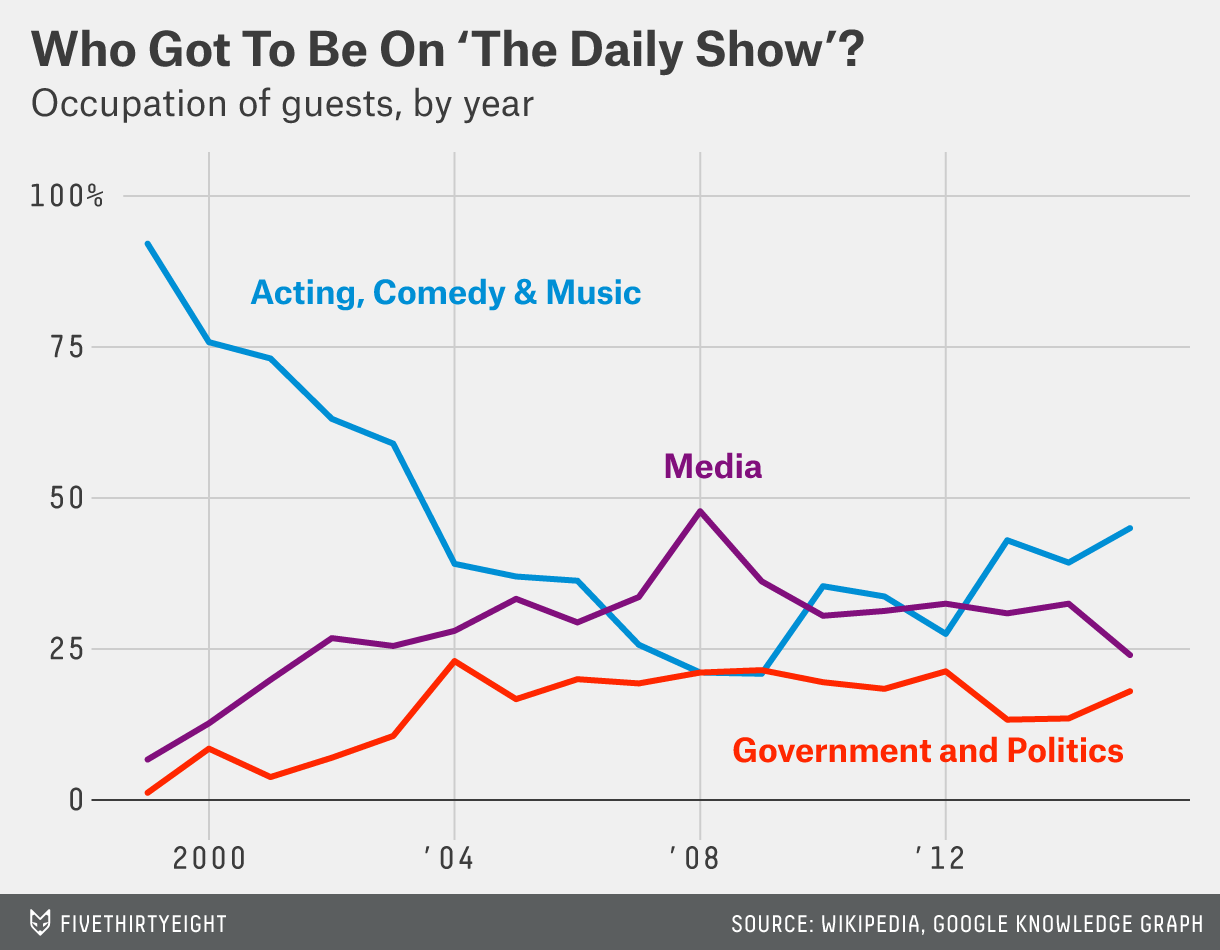

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

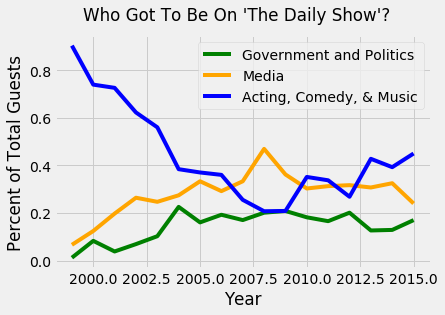

In [0]:
year = percents.index
gov = percents['Government and Politics']
media = percents['Media']
celebs = percents['Acting, Comedy & Music']

plt.plot(year, gov, color='g', label='Government and Politics')
plt.plot(year, media, color='orange', label='Media')
plt.plot(year, celebs, color='b', label='Acting, Comedy, & Music')

plt.legend(loc='upper right')

plt.xlabel('Year')
plt.ylabel('Percent of Total Guests')
plt.suptitle("Who Got To Be On 'The Daily Show'?")
#plt.title("Occupation of guests, by year") - this made the graph very crowded and I couldn't figure out how to fix it

plt.show();

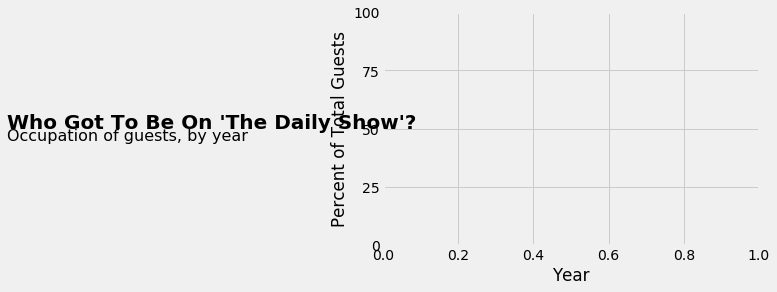

In [0]:
#I jumped ahead to throw the formatting in first and just didn't get to it

plt.style.use('fivethirtyeight')

plt.text(x=-1, 
         y=50, 
         fontsize=20, 
         fontweight='bold', 
         s="Who Got To Be On 'The Daily Show'?")

plt.text(x=-1, 
         y=45, 
         fontsize=16, 
         s="Occupation of guests, by year")

plt.xlabel('Year')
plt.ylabel('Percent of Total Guests')
plt.yticks(range(0,125,25));

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)